### 점진적인 학습
#### [ 점진적 학습 ]
#### -훈련에 필요한 데이터가 한번에 다 수집된 경우가 아니라 시간차를 두고 수집이 되는 경우에는 어떻게 훈련을 시킬지를 해결함
#### - 데이터가 수집될 때마다 학습을 이어나가는 훈련방식을 의미함
#### - 점진적 학습의 대표적인 알뢰즘으로 " 확률적 경사하강법"이 주로 사용됨
---
#### [ 확률적 경사하강법 - SGD: Stochastic Gradient Descent ]
#### - 경사 : 기울기를 의미함
#### - 하강법 : 내려가는 방법
#### - 경사하강법 : 원하는 지점(결과값)에 도달하기 위해 가장 가파른 경사를 따라 내려가는 방법을 찾는 것
#### - 확률적 : 무작위 또는 랜덤하게의 기적적 표현으로 확률적이라고 칭함
#### - 확률적 경사하강법 : 훈련데이터의 전체 특성들중에서 하나씩 랜덤하게 선택하여 가장 가파른 길을 찾아내는 방법
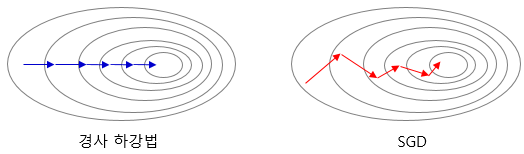
--- 
#### [ 내부적으로 처리되는 확률적 경사하강법 순서]
#### 1) 훈련데이터(독립변수)에서랜덤하게 하나의 특성을 선택하게 됨
#### 2)선택한 특성을 이용해서 경사를 조금씩 내려감
#### 3)내려갈수 있을때까지 내려감(하강)
#### 4) 훈련세트에서 다른 특성을 랜덤하게 또 다시 선택해서 1~3번을 반복

## 데이터 준비

In [1]:
import pandas as pd
import numpy as np

In [2]:
fish = pd.read_csv('./data/07_fish.csv')
fish.head(3)

,Species,Weight,Length,Diagonal,Height,Width
0,Bream,242.0,25.4,30.0,11.5200,4.0200
1,Bream,290.0,26.3,31.2,12.4800,4.3056
2,Bream,340.0,26.5,31.1,12.3778,4.6961


In [5]:
fish_input = fish.drop(columns='Species')
fish_target = fish['Species']


In [6]:
fish_input.shape, fish_target.shape

((159, 5), (159,))

In [7]:
from sklearn.model_selection import train_test_split

In [9]:
train_x, test_x, train_y, test_y = train_test_split(fish_input, fish_target, test_size=0.25, random_state=42)
train_x.shape, test_x.shape, train_y.shape, test_y.shape

((119, 5), (40, 5), (119,), (40,))

In [47]:
from sklearn.preprocessing import StandardScaler as sc

In [11]:
std = sc()
std.fit(train_x)
train_scaled = std.transform(train_x)
test_scaled = std.transform(test_x)
train_scaled.shape, test_scaled.shape

((119, 5), (40, 5))

## 훈련하기

In [14]:
from sklearn.linear_model import SGDClassifier

### SGDClassifier 알고리즘
#### random_state : 특성을 랜덤하게 경사하강을 하기 위함
#### max_iter : 훈련 반복횟수(epoch라고도 함)로 클수록 학습시간이 오래 걸림
#### - 훈련 반복 횟수가 부족한 경우에도 지정된 반복횟수만큼만 학습함
#### - 가장 적합한 반복횟수를 찾는 작업도 필요(하이퍼파라미터 튜닝)
---
#### loss : 손실함수 (log - 로지스틱 손실함수인 sigmoid가 사용됨)
#### - 조금씩 내려오면서 손실이 작은 쪽을 찾아서 내려오기 위한 방법
#### - 사람은 손실이 작은 값들을 알수 없음
#### - 학습모델이 가지고 있는 손실계산식을 통해 결정되기에 사람은 관여 안 함
#### - 훈련모델이 분류결과에 만족한다면 훈련을 종료시킴
#### - 사람은 분류성격에 맞게 사용할 손실함수를 지정하면 됨

In [13]:
sc = SGDClassifier(loss='log',max_iter=10,random_state=42)
sc

SGDClassifier(loss='log', max_iter=10, random_state=42)

In [15]:
sc.fit(train_scaled, train_y)

C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(
C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:702: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  warnings.warn(


SGDClassifier(loss='log', max_iter=10, random_state=42)

In [18]:
print('훈련평가 :', np.round(sc.score(train_scaled, train_y),decimals=3))
print('테스트평가 :', np.round(sc.score(test_scaled, test_y),decimals=3))
print('[해석] 전체적으로 학습성능이 낮고 과소적합이 보임')

훈련평가 : 0.773
테스트평가 : 0.775
[해석] 전체적으로 학습성능이 낮고 과소적합이 보임


### 이어서 학습시키기 - 다시 학습데이터를 넣어서 재학습(10번)
#### sc.partial_fit(train_scaled, train_y)

In [20]:
sc.partial_fit(train_scaled, train_y)
print('훈련평가 :', np.round(sc.score(train_scaled, train_y),decimals=3))
print('테스트평가 :', np.round(sc.score(test_scaled, test_y),decimals=3))
print('[해석] 이전 학습보다 학습성능이 높아졌으나 과소적합이 보임')

훈련평가 : 0.748
테스트평가 : 0.775
[해석] 이전 학습보다 학습성능이 높아졌으나 과소적합이 보임


### 하이퍼파라미터 튜닝하여 가장 좋은 성능을 찾기 - 반복횟수(에포크)
### <span style = 'color:red'>반복하면서 학습하는 경우는 partial_fit으로 실행해야 함</span>

In [24]:
# 반복적으로 학습한 성능값 저장
train_score = []
test_score = []
sc = SGDClassifier(loss='log',random_state=42)

In [22]:
classes = np.unique(train_y)
classes

array(['Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'],
      dtype=object)

In [27]:
# 반복 학습하고 학습률 저장
# classes : 훈련에 사용할 범주(종속변수)
# - 향후 현업에서 종속변수의 값을 수정해서 넣어서 훈련해도 됨
for idx in range(0,300,1):
    sc.partial_fit(train_scaled, train_y, classes=classes)
    train_score.append(sc.score(train_scaled, train_y))
    test_score.append(sc.score(test_scaled, test_y))

In [29]:
len(train_score),len(test_score)

(600, 600)

In [32]:
# 횟수가 올라갈수록 정확도가 올라감
train_score

[0.6218487394957983,
 0.6386554621848739,
 0.7310924369747899,
 0.7226890756302521,
 0.7310924369747899,
 0.7647058823529411,
 0.7310924369747899,
 0.8151260504201681,
 0.7478991596638656,
 0.8319327731092437,
 0.8151260504201681,
 0.8571428571428571,
 0.8571428571428571,
 0.8403361344537815,
 0.865546218487395,
 0.865546218487395,
 0.8571428571428571,
 0.865546218487395,
 0.8823529411764706,
 0.865546218487395,
 0.8823529411764706,
 0.865546218487395,
 0.8823529411764706,
 0.8739495798319328,
 0.8823529411764706,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.8907563025210085,
 0.8907563025210085,
 0.8907563025210085,
 0.8823529411764706,
 0.8823529411764706,
 0.8907563025210085,
 0.907563025210084,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.8991596638655462,
 0.907563025210084,
 0.907563025210084,
 0.907563025210084,
 0.907563025210084,
 0.9159663865546218,
 0.9159663865546218,
 0.9159663865546218,
 0.9159663865546218,
 0

### 반복학습에 따른 훈련정확도 비교

In [31]:
import matplotlib.pyplot as plt

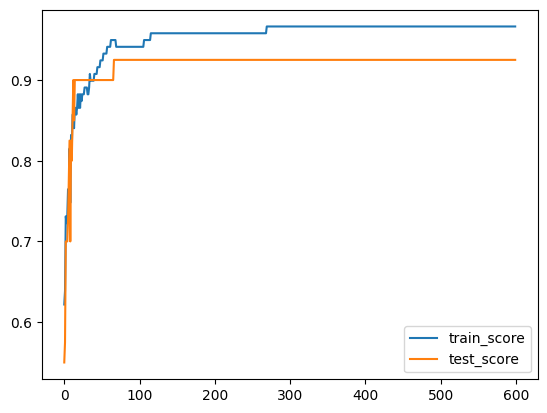

In [33]:
plt.plot(train_score, label = 'train_score')
plt.plot(test_score, label = 'test_score')
plt.legend()
plt.show()

### [ 그래프 해석 ]
#### - 훈련 및 테스트 두 선분이 가장 가까운 지점중에
#### - 과대 또는 과소가 일어나는 지점이 바로 전부분을 확인(단, 가장 가까운...)
#### -적합한 지점을 사람이 선택
#### -max_iter값에 선택값을 넣어서 다시 학습

### 100 반복횟수로 재 학습

In [37]:
# tol = None : 훈련이 끝나더라도 종료하지 말고 max_iter횟수만큼 무조건 진행
sc = SGDClassifier(loss='log',random_state=42, max_iter=100, tol=None)
sc
# sc.partial_fit(train_scaled, train_y, classes=classes)

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [38]:
sc.fit(train_scaled, train_y)

C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [40]:
print('훈련평가 :', np.round(sc.score(train_scaled, train_y),decimals=3))
print('테스트평가 :', np.round(sc.score(test_scaled, test_y),decimals=3))
print('[해석] 훈련정확도가 우수하고 과적합더 거의 보이지 않음')

훈련평가 : 0.958
테스트평가 : 0.925
[해석] 훈련정확도가 우수하고 과적합더 거의 보이지 않음


### 전체 데이터 예측

In [55]:
fish_input.shape, fish_target.shape

((159, 5), (159,))

In [61]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
std.fit(fish_input)
scaled_fish = std.transform(fish_input)
scaled_fish.shape

(159, 5)

In [63]:
sc = SGDClassifier(loss='log',random_state=42, max_iter=100, tol=None)
sc

SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [64]:
sc.fit(scaled_fish,fish_target)

C:\anaconda3\envs\sj_prj\lib\site-packages\sklearn\linear_model\_stochastic_gradient.py:163: FutureWarning: The loss 'log' was deprecated in v1.1 and will be removed in version 1.3. Use `loss='log_loss'` which is equivalent.
  warnings.warn(


SGDClassifier(loss='log', max_iter=100, random_state=42, tol=None)

In [98]:
sc.score(scaled_fish,fish_target)

0.9119496855345912

In [67]:
total_pred = sc.predict(scaled_fish)

In [68]:
len(total_pred)

159

### 정답확인

In [86]:
df = pd.concat([fish_input,fish_target], axis=1)

In [87]:
df['predict'] = pd.DataFrame(total_pred)

In [88]:
df

,Weight,Length,Diagonal,Height,Width,Species,predict
0,242.0,25.4,30.0,11.5200,4.0200,Bream,Bream
1,290.0,26.3,31.2,12.4800,4.3056,Bream,Bream
2,340.0,26.5,31.1,12.3778,4.6961,Bream,Bream
3,363.0,29.0,33.5,12.7300,4.4555,Bream,Bream
4,430.0,29.0,34.0,12.4440,5.1340,Bream,Bream
...,...,...,...,...,...,...,...
154,12.2,12.2,13.4,2.0904,1.3936,Smelt,Smelt
155,13.4,12.4,13.5,2.4300,1.2690,Smelt,Smelt
156,12.2,13.0,13.8,2.2770,1.2558,Smelt,Smelt
157,19.7,14.3,15.2,2.8728,2.0672,Smelt,Perch


In [95]:
# 정답확인
o_cnt = len(df[df['Species'] == df['predict']])

In [94]:
# 오답확인
x_cnt = len(df[df['Species'] != df['predict']])

In [96]:
all_cnt = len(df)
o_p = np.round(o_cnt / all_cnt * 100,2)
x_p = np.round(x_cnt / all_cnt * 100,2)

print('총 100%중 정답률{0}%, 오답률{1}%'.format(o_p,x_p))

총 100%중 정답률91.19%, 오답률8.81%
